In [1]:
import pandas as pd
import numpy as np

In [50]:
data = pd.read_csv('/Users/kookhan/Downloads/Preprocessed_data.csv')
data

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031170,1031170,278851,"dallas, texas, usa",33.0000,0743203763,0,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon & Schuster,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,Golf lovers will revel in this collection of t...,en,['Humor'],dallas,texas,usa
1031171,1031171,278851,"dallas, texas, usa",33.0000,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,A daring twist on the travel-adventure genre t...,en,['Nature'],dallas,texas,usa
1031172,1031172,278851,"dallas, texas, usa",33.0000,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,9,9,9,dallas,texas,usa
1031173,1031173,278851,"dallas, texas, usa",33.0000,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,These hilarious stories by the creator of publ...,en,['Fiction'],dallas,texas,usa


In [33]:
# Checking total count for categories

len(data['Category'].unique())

# There are 6448 categories.. minor categories should be merged

6448

In [34]:
# Merging minor categories having less than 5000 counts to 'Others'

d = data.groupby('Category').count().sort_values(ascending = False, by='user_id')
condition = d['user_id'] < 2000
others = d[condition].index
len(others)

# 6439 minor categories will be merged to 'Others'

6425

In [35]:
# Applying above new simplized categorization to 'new_category' column

data['new_category'] = data.apply(lambda x: x['Category'] if x['Category'] not in others else 'other', axis = 1)
condition = data['Category'] == '9'
data.loc[condition,'new_category'] = 'other'

data[['Category','new_category']]

,Category,new_category
0,['Social Science'],['Social Science']
1,['Actresses'],other
2,['Actresses'],other
3,['Actresses'],other
4,['Actresses'],other
...,...,...
1031170,['Humor'],['Humor']
1031171,['Nature'],other
1031172,9,other
1031173,['Fiction'],['Fiction']


In [24]:
data['new_category'].unique()

array(["['Social Science']", 'other', "['Fiction']", "['History']",
       "['Humor']", "['Cooking']", "['Juvenile Fiction']",
       "['Health & Fitness']", "['Science']",
       "['Biography & Autobiography']", "['Business & Economics']",
       "['Literary Criticism']", "['Self-Help']", "['Religion']",
       "['Poetry']", "['Juvenile Nonfiction']", "['Computers']",
       "['Psychology']", "['Body, Mind & Spirit']",
       "['Family & Relationships']", "['Travel']", "['Drama']",
       "['True Crime']"], dtype=object)

In [36]:
# Pivoting each customer's rating data by categories

book_mapping = pd.DataFrame({'new_category':data['new_category'].unique()})
book_mapping['Category_id'] = book_mapping.index

rating_data = data[['user_id','new_category','rating']]
rating_data = rating_data.merge(book_mapping, how = 'left', on = 'new_category')
rating_data.drop(columns = 'new_category', inplace=True)
rating_data

pivot = rating_data.pivot_table(index = 'user_id', columns = 'Category_id', values = 'rating', aggfunc='mean')
pivot.head(3)


Category_id,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2.7,2.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,3.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
book_mapping

,new_category,Category_id
0,['Social Science'],0
1,other,1
2,['Fiction'],2
3,['History'],3
4,['Humor'],4
5,['Cooking'],5
6,['Juvenile Fiction'],6
7,['Health & Fitness'],7
8,['Science'],8
9,['Biography & Autobiography'],9


In [37]:
# Data cleasing for NaN

pivot_f = pivot.fillna(0)
pivot_f

Category_id,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,2.700000,2.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,10.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,8.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.000000,0.00,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,4.769231,1.75,0.0,3.5,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
import sklearn
from sklearn import cluster
import matplotlib.pyplot as plt

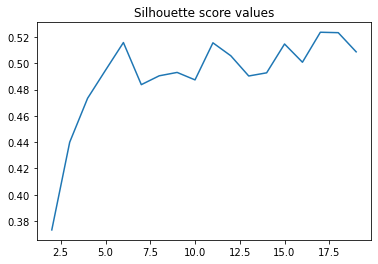

In [10]:
# Finding the best number of clusters by calculating 'Silhouette score values'

NumberOfClusters=range(2,20)
silhouette_score_values = []

for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', random_state=0)
    classifier.fit(pivot_f)
    labels= classifier.predict(pivot_f)
    silhouette_score_values.append(sklearn.metrics.silhouette_score(pivot_f,labels ,metric='euclidean', sample_size=None, random_state=None))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values")
plt.show()

# Below plot shows 17 is the best number of clusters 

In [39]:
silhouette_score_table = pd.DataFrame({'Cluster No.':list(NumberOfClusters), 'Sil_value': silhouette_score_values} )
silhouette_score_table

,Cluster No.,Sil_value
0,2,0.373205
1,3,0.439948
2,4,0.473403
3,5,0.494732
4,6,0.515801
5,7,0.483761
6,8,0.490495
7,9,0.493067
8,10,0.487381
9,11,0.515594


In [40]:
# Clustering pivoted data to 17 cluster centers

estimator = cluster.KMeans(n_clusters=17, init='k-means++', random_state=0)
estimator.fit(pivot_f)

KMeans(n_clusters=17, random_state=0)

In [41]:
# Rating data for 17 cluster centers

knn_result = pd.DataFrame(estimator.cluster_centers_, columns=book_mapping['new_category'])
knn_result['size'] = pd.Series(estimator.labels_).value_counts()
round(knn_result, 2)

new_category,['Social Science'],other,['Fiction'],['History'],['Humor'],['Cooking'],['Juvenile Fiction'],['Health & Fitness'],['Science'],['Biography & Autobiography'],...,['Poetry'],['Juvenile Nonfiction'],['Computers'],['Psychology'],"['Body, Mind & Spirit']",['Family & Relationships'],['Travel'],['Drama'],['True Crime'],size
0,0.03,6.84,6.80,0.03,0.04,0.03,0.03,0.01,0.05,0.19,...,0.07,0.06,0.04,0.05,0.03,0.02,0.07,0.07,0.08,6289
1,0.00,8.31,0.07,0.00,0.01,0.01,0.02,0.00,0.01,0.02,...,0.01,0.02,0.01,0.01,0.00,0.00,0.01,0.01,0.01,15596
2,0.01,0.12,0.07,0.01,0.01,0.03,0.02,0.01,0.03,0.02,...,0.04,0.06,0.03,0.03,0.00,0.00,0.05,0.03,0.03,28878
3,0.01,0.80,4.50,0.01,0.01,0.02,0.04,0.00,0.02,0.04,...,0.03,0.03,0.02,0.03,0.00,0.01,0.05,0.03,0.04,7478
4,0.03,0.65,0.48,0.07,0.06,0.03,7.78,0.02,0.03,0.14,...,0.04,0.19,0.04,0.01,0.02,0.03,0.06,0.05,0.02,2088
5,0.01,0.11,8.27,0.01,0.01,0.01,0.02,0.00,0.01,0.02,...,0.01,0.01,0.00,0.01,0.00,0.00,0.02,0.01,0.01,10913
6,0.20,5.99,4.37,0.24,0.39,0.11,8.05,0.08,0.18,0.96,...,0.16,0.64,0.07,0.13,0.15,0.17,0.17,0.25,0.13,1544
7,0.05,2.55,2.17,0.09,0.11,0.08,0.19,0.03,0.08,7.74,...,0.09,0.11,0.07,0.11,0.07,0.08,0.17,0.08,0.13,3070
8,0.20,2.78,1.66,0.23,0.32,0.18,0.42,0.13,0.18,0.64,...,0.16,0.22,0.17,0.45,7.75,0.25,0.22,0.12,0.14,546
9,0.44,3.36,2.60,0.47,0.65,0.46,0.76,7.73,0.32,1.39,...,0.24,0.59,0.21,0.52,0.58,0.75,0.44,0.14,0.25,548


In [44]:
knn_result.to_csv('/Users/kookhan/Downloads/cluster_centers.csv')

In [48]:
# Cluster description based on above rating data for each cluster center

c_desc = ['other, Fiction', 'other - High', 'No preference', 'Fiction - Med', 'Juvenile Fiction', 'Fiction - High', 'Juvenile Fiction, other, Fiction', 'Biography & Autobiography, other, Fiction', 'Body, Mind & Spirit, other, Fiction', 'Health & Fitness, other, Fiction', 'other - Med', 'Family & Relationships, other, Fiction', 'Religion, other, Fiction', 'Humor, other, Fiction', 'oth., B. & A., Juv. Fic. - Broad Preference', 'Social Science, other, Fiction', 'History, other, Fiction'] 
cluster_desc = pd.DataFrame({'Cluster No.': knn_result.index, 'Cluster Desc': c_desc, 'Cluster Size': knn_result['size']})
cluster_desc

,Cluster No.,Cluster Desc,Cluster Size
0,0,"other, Fiction",6289
1,1,other - High,15596
2,2,No preference,28878
3,3,Fiction - Med,7478
4,4,Juvenile Fiction,2088
5,5,Fiction - High,10913
6,6,"Juvenile Fiction, other, Fiction",1544
7,7,"Biography & Autobiography, other, Fiction",3070
8,8,"Body, Mind & Spirit, other, Fiction",546
9,9,"Health & Fitness, other, Fiction",548


In [49]:
# Applying cluster labels to raw data

pivot_f['cluster'] = estimator.labels_

user_cluster_mapping = pd.DataFrame({'cluster':pivot_f['cluster']})

data_with_cluster = data.merge(user_cluster_mapping, how = 'left', on = 'user_id')
data_with_cluster

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,...,img_m,img_l,Summary,Language,Category,city,state,country,new_category,cluster
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa,['Social Science'],2
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada,other,10
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada,other,7
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN,other,14
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada,other,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031170,1031170,278851,"dallas, texas, usa",33.0000,0743203763,0,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon & Schuster,...,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,Golf lovers will revel in this collection of t...,en,['Humor'],dallas,texas,usa,['Humor'],6
1031171,1031171,278851,"dallas, texas, usa",33.0000,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,...,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,A daring twist on the travel-adventure genre t...,en,['Nature'],dallas,texas,usa,other,6
1031172,1031172,278851,"dallas, texas, usa",33.0000,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,9,9,9,dallas,texas,usa,other,6
1031173,1031173,278851,"dallas, texas, usa",33.0000,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,These hilarious stories by the creator of publ...,en,['Fiction'],dallas,texas,usa,['Fiction'],6
